## Набор данных клиентов телекоммуникаций 

In [17]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('telecom_users.csv')
data_temp = pd.read_csv('telecom_users.csv')
print(data.shape)
data.head()

(5986, 22)


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


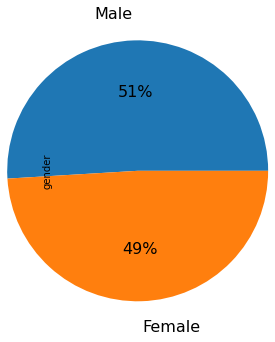

In [14]:
gender = data['gender'].value_counts()
plt.figure(figsize=(4, 3))
plot = gender.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)
plt.show()

Из круговой диаграммы можно сделать вывод: `клиентов-мужчин` больше, чем `клиентов-женщин`

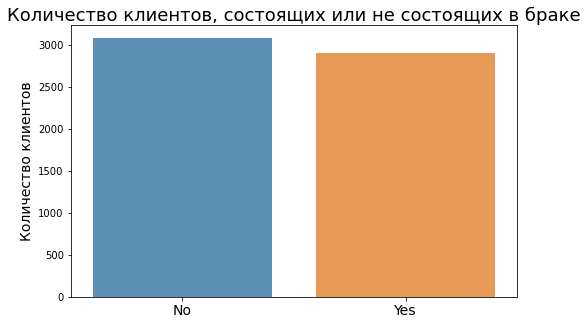

In [23]:
ismaried = data['Partner'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=ismaried.index, y=ismaried.values, alpha=0.8)
plt.title('Количество клиентов, состоящих или не состоящих в браке', fontsize=18, pad=1)
plt.ylabel('Количество клиентов', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

Из данной гистограммы делаем вывод, что клиентов `не состоящих в браке` больше
 
 

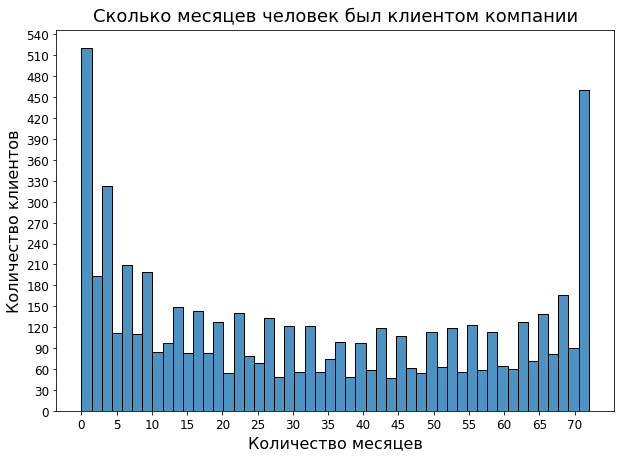

In [25]:
tenure = data['tenure']
plt.figure(figsize=(10, 7))
sns.histplot(tenure, bins=50, alpha=0.8)
plt.title('Сколько месяцев человек был клиентом компании', fontsize=18, pad=10)
plt.xticks(list(range(0, tenure.max(), 5)), fontsize=12)
plt.yticks(list(range(0, 550, 30)), fontsize=12)
plt.xlabel('Количество месяцев', fontsize=16)
plt.ylabel('Количество клиентов', fontsize=16)
plt.show()

Через `1-2 месяца` услугами компании пользуются `~ 510 человек`, но затем резко падает. Можно предположить, что в это время `большинство клиентов уходят`

# Heatmap

In [58]:
data.head(2)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No


При построении матрицы корреляции(`Seaborn Heatmaps`) полностью игнорируются любые нечисловые столбцы. Поэтому переменные были заменены на числовые

In [60]:
object_cols = list(data_temp.dtypes[data.dtypes == object].index)
for i in object_cols:
    data_temp[i] = data_temp[i].astype('category')

In [61]:
cat_columns = data_temp.select_dtypes(['category']).columns
data_temp[cat_columns] = data_temp[cat_columns].apply(lambda x: x.cat.codes)

In [63]:
data_temp.head() 

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,4252,1,0,1,1,72,1,2,2,...,1,1,1,1,2,0,1,24.10,1066,0
1,4528,5806,0,0,0,0,44,1,0,1,...,2,0,2,0,0,1,1,88.15,2901,0
2,6344,5577,0,1,1,0,38,1,2,1,...,0,0,0,0,0,1,0,74.95,2126,1
3,6739,4243,1,0,0,0,4,1,0,0,...,0,0,0,2,0,1,2,55.90,1733,0
4,432,1270,1,0,0,0,2,1,0,0,...,2,0,0,0,0,0,2,53.45,308,0


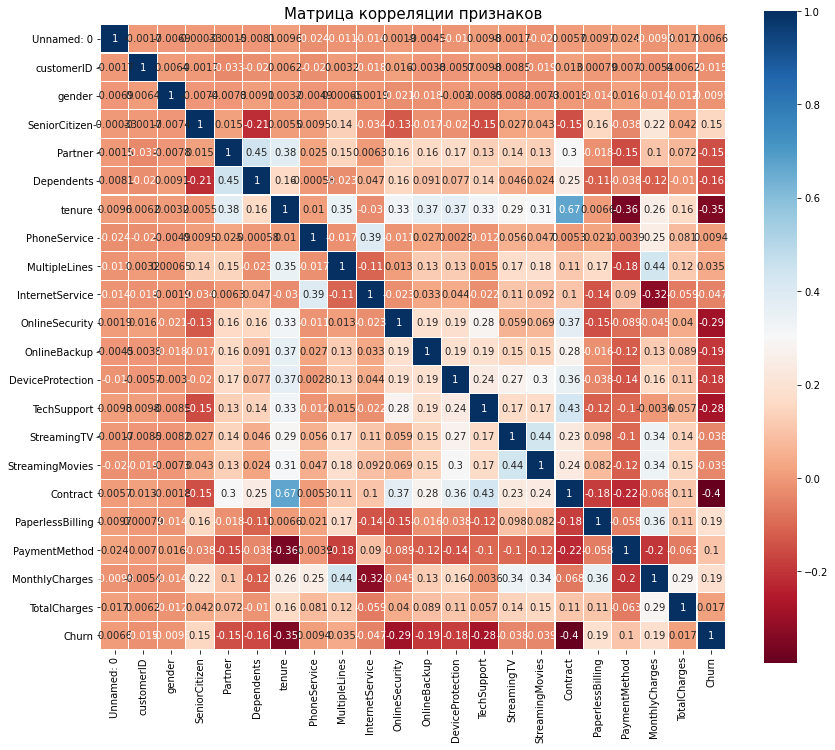

In [56]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Матрица корреляции признаков', y=1, size=15)
sns.heatmap(data_temp.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Исходя из данной матрицы, можно выявить, что наибольшую корреляцию между собой имеют столбцы **Contract** и **tenure**    
**Contract** - тип контракта с клиентом (помесячно, один год, два года)                                                         
**tenure** - сколько месяцев человек был клиентом компании

## Boxplot

<AxesSubplot:title={'center':'Размах распределения для ежемесяного платежа'}>

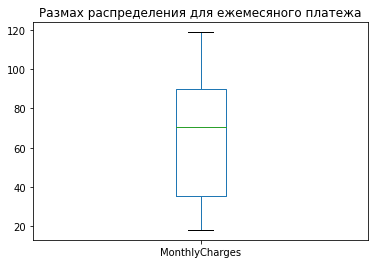

In [72]:
data['MonthlyCharges'].plot(kind='box' , title = 'Размах распределения для ежемесяного платежа')

Медиана распределения на уровне **70**.  Точек выброса нет, то есть все значения, вписываются в промежуток, заданный усами графика

## Scatter plot matrix 

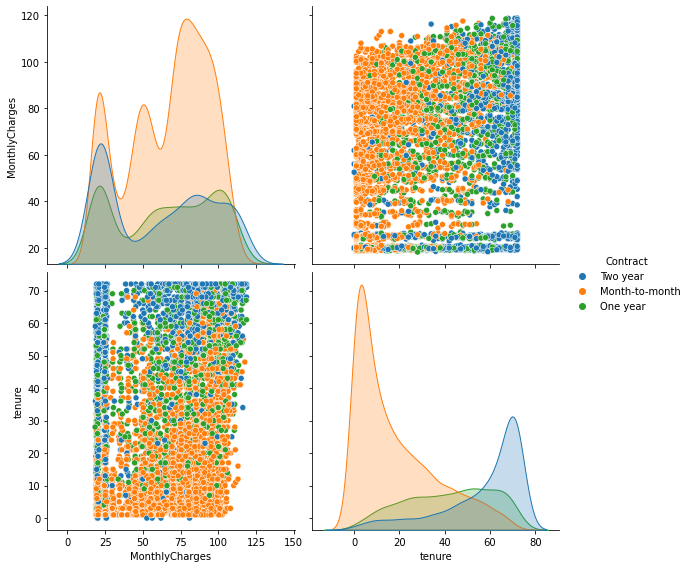

In [113]:
sns_plot = sns.pairplot(
    data[['MonthlyCharges','tenure', 'Contract']],  hue='Contract', height=4)


sns_plot

В данном примере рассмотрели взаимосвязь между тремя столбцами:**ежемесячный платеж**, **тип контракта** и **сколько месяцев клиента пользуется услугами компании**

По первому графику можно судить, что **ежемесяная плата** для контракта с `ежемесячной` оплатой существенно выше, чем когда оплата производится сразу за `один год` или за `два года`

Из четвертого графика: клиенты, которые только что начали пользоваться услугами компании, предпочитают `ежемесячную плату` за услуги, потом постепенно переходят к более выгодным контрактам(`один год`, `два года`) 